In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bgr_image = cv2.imread("./original_image.jpg")
rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
hsv_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)

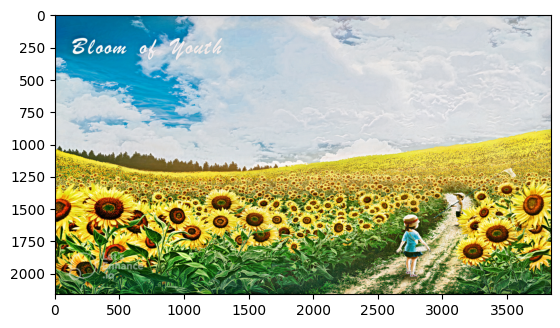

In [3]:
plt.imshow(rgb_image)

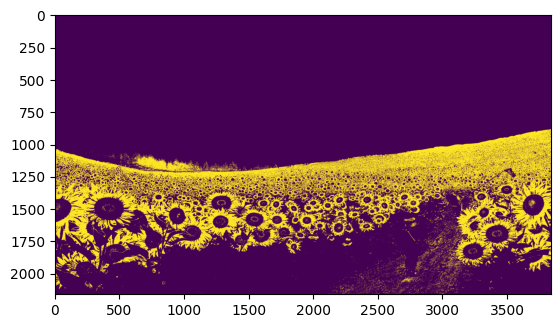

In [4]:
# H - Hue (Tông màu): Chạy từ 0 đến 179 (Lưu ý: Lý thuyết màu chuẩn là 0-360 độ, nhưng OpenCV chia đôi để nhét vừa vào 1 byte dữ liệu).
# S - Saturation (Độ bão hòa / Độ đậm): Chạy từ 0 đến 255 (Lý thuyết màu chuẩn là từ 0% đến 100%, nhưng OpenCV dùng thang 0-255).
# V - Value (Giá trị / Độ sáng): Chạy từ 0 đến 255 (Lý thuyết màu chuẩn là từ 0% đến 100%, nhưng OpenCV dùng thang 0-255).
# Trường hợp màu vàng ở đây: tông màu từ 20 đến 30, độ bão hòa từ 100 đến 255 và độ sáng từ 100 đến 255.

lower_yellow = np.array([20, 100, 100]) # Lower bound for yellow in HSV
upper_yellow = np.array([30, 255, 255]) # Upper bound for yellow in HSV

# Create a mask for yellow color
mask = cv2.inRange(hsv_image, lower_yellow, upper_yellow)

# plt.imshow(mask) mặc định sẽ hiển thị màu tím và vàng (hoặc xanh lá) tùy phiên bản Matplotlib
plt.imshow(mask)

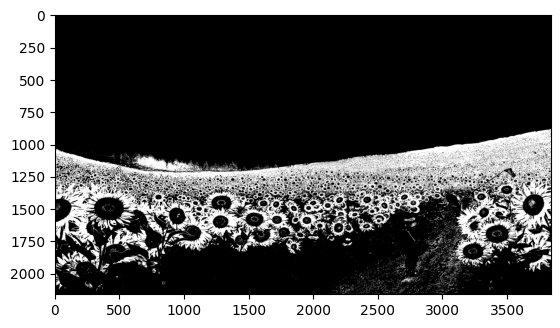

In [5]:
plt.imshow(mask, cmap='gray') # Hiển thị ảnh nhị phân dưới dạng ảnh xám

<small>

**1. Cấu trúc Mảng 3D (3D Array) trong OpenCV**

Máy tính nhìn một bức ảnh màu dưới dạng một khối không gian 3 chiều `[[[0, 255, 255]]]`:
* `[[Row]]` (Ngoài cùng): **Toàn bộ ảnh** (chỉ có 1 hàng).
* `[[Pixel]]` (Ở giữa): **1 Hàng** (chỉ có 1 điểm ảnh).
* `[0, 255, 255]` (Trong cùng): **1 Điểm ảnh** (3 kênh màu B-G-R).

**2. Kiểu dữ liệu uint8**
* Tên: **Unsigned Integer 8-bit** (Số nguyên không dấu 8-bit).

*Giải nghĩa:*
1. **Unsigned:** Chỉ chứa số dương.
2. **Integer:** Số tròn, không thập phân.
3. **8-bit:** Lưu trữ $2^8 = 256$ giá trị.

*Tại sao dùng cho ảnh?*
* **Thang màu:** `0-255` khớp chuẩn với thang độ sáng (0: tối, 255: sáng).
* **Hiệu suất:** Tiết kiệm bộ nhớ gấp 4-8 lần so với `int`, giúp xử lý ảnh nhanh.

</small>

In [6]:
blue_hsv = np.uint8([[[120, 255, 255]]])  # Màu xanh dương trong không gian HSV
blue_bgr = cv2.cvtColor(blue_hsv, cv2.COLOR_HSV2BGR)[0][0]
print("Màu xanh dương trong không gian BGR:", blue_bgr)

Màu xanh dương trong không gian BGR: [255   0   0]


In [7]:
# Tạo bản sao của ảnh gốc để thay đổi màu sắc
image_result = bgr_image.copy()

# Thay thế màu vàng (theo mask) bằng màu xanh dương
image_result[mask > 0] = blue_bgr

# Chuyển ảnh kết quả từ BGR sang RGB để hiển thị đúng màu
image_result_rgb = cv2.cvtColor(image_result, cv2.COLOR_BGR2RGB)

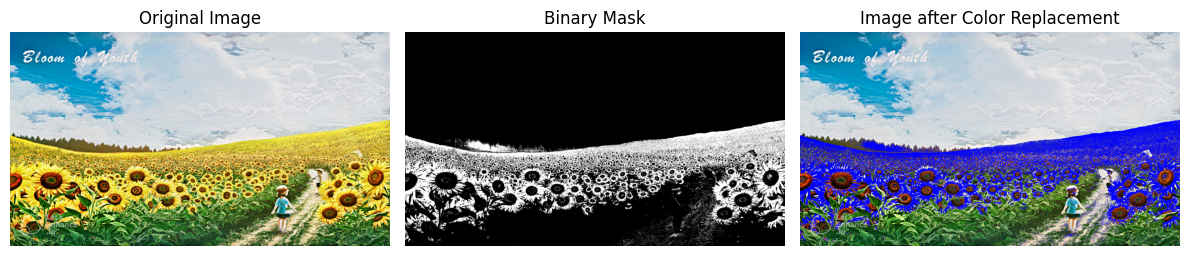

In [8]:
# Plot the original and result images side by side
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

axs[0].imshow(rgb_image)
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(mask, cmap='gray')
axs[1].set_title("Binary Mask")
axs[1].axis('off')

axs[2].imshow(image_result_rgb)
axs[2].set_title("Image after Color Replacement")
axs[2].axis('off')

plt.tight_layout()
plt.show()